## **Setup**

In [4]:
!pip install jax jaxlib matplotlib


In [9]:
!pip install optax


In [11]:
!pip install jax jaxlib optax matplotlib


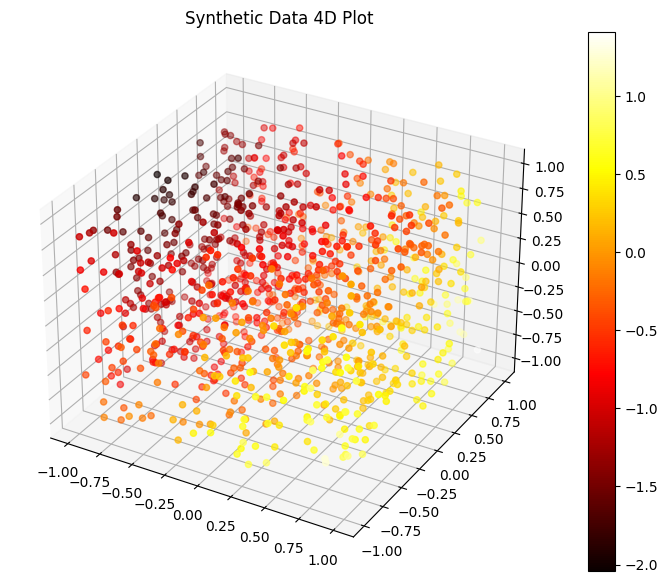

In [18]:
import jax
import jax.numpy as jnp
from jax import random, grad, jit, vmap
from jax.example_libraries import optimizers
import optax

def generate_data():
    np.random.seed(42)
    x1 = np.random.uniform(-1, 1, 1000)
    x2 = np.random.uniform(-1, 1, 1000)
    x3 = np.random.uniform(-1, 1, 1000)
    y = np.sin(x1) + x2**2 - np.log1p(np.exp(x3))
    return np.stack([x1, x2, x3], axis=1), y

X, y = generate_data()

optimizer = optax.adam(learning_rate=0.01)
opt_state = optimizer.init(params)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.hot())
fig.colorbar(img)
plt.title("Synthetic Data 4D Plot")
plt.show()


## **Neural Network Layers Initialization**

In [19]:
def init_layer(key, d_in, d_out):
    w_key, b_key = random.split(key)
    return random.normal(w_key, (d_in, d_out)) * jnp.sqrt(2 / d_in), random.normal(b_key, (d_out,))

def init_network(layer_sizes, key):
    keys = random.split(key, len(layer_sizes))
    return [init_layer(k, m, n) for k, m, n in zip(keys, layer_sizes[:-1], layer_sizes[1:])]

## **Forward Pass**

In [20]:
def relu(x):
    return jnp.maximum(0, x)

def forward(params, x):
    *hidden_layers, last_layer = params
    for w, b in hidden_layers:
        x = relu(jnp.dot(x, w) + b)
    w_last, b_last = last_layer
    return jnp.dot(x, w_last) + b_last

## **Loss and Update Function**

In [21]:
def mse_loss(params, x, y):
    pred = forward(params, x)
    return jnp.mean((pred - y) ** 2)

# Define the update step
@jax.jit
def update(params, x, y, opt_state):
    # Compute gradients
    grads = jax.grad(mse_loss)(params, x, y)

    # Compute update and new opt_state
    updates, opt_state = optimizer.update(grads, opt_state)

    # Apply updates to the parameters
    new_params = optax.apply_updates(params, updates)

    return new_params, opt_state


## **Training Loop**

Epoch 0: Loss 0.6740428805351257
Epoch 100: Loss 0.43809473514556885
Epoch 200: Loss 0.4379499852657318
Epoch 300: Loss 0.4379047751426697
Epoch 400: Loss 0.4378799498081207
Epoch 500: Loss 0.4378635883331299
Epoch 600: Loss 0.43785151839256287
Epoch 700: Loss 0.4378426671028137
Epoch 800: Loss 0.4378359615802765
Epoch 900: Loss 0.43783050775527954


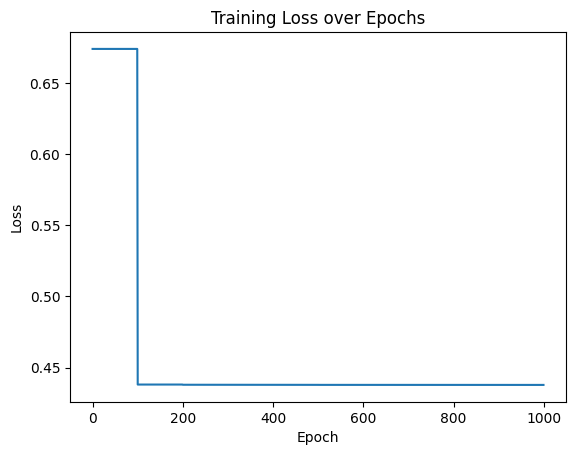

In [26]:
key = random.PRNGKey(42)
layer_sizes = [3, 64, 64, 1]
params = init_network(layer_sizes, key)

optimizer = optax.adam(0.01)
opt_state = optimizer.init(params)

for epoch in range(1000):
    params, opt_state = update(params, X, y, opt_state)
    if epoch % 100 == 0:
        loss_val = mse_loss(params, X, y)
        print(f"Epoch {epoch}: Loss {loss_val}")
    losses.append(loss_val)


# Plot training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


## **Plotting Actual vs. Predicted Values**

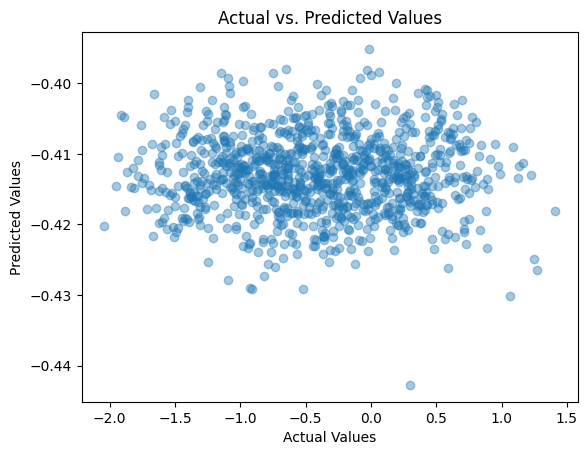

In [27]:

y_pred = forward(params, X)  # Use the 'forward' function defined earlier

# Now, plotting the actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(y, y_pred, alpha=0.4)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
